In [17]:
# import matplotlib
# matplotlib.use('GTKAgg')

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math



mu, sigma = 0, 2 # mean and standard deviation
particelsAxisX = [-100,100]
particelsAxisY = [-100,100]
msodAxisX = [0,1010]
msodAxisY = [0,8000]

epochs = 1000
amount_particels = 1000


In [18]:


### Graph
def initGraphs():
    ax = fig.add_subplot(1, 2, 1)   
    drawLabels(ax,0)
    
    axMsod = fig.add_subplot(1, 2, 2)
    drawMsodLabels(axMsod)
    
    plt.subplots_adjust(bottom=0.25, top=0.75, wspace=0.5, hspace=0.5)
    fig.show()
    return ax, axMsod 

def drawMsodLabels(axMsod):    
    axMsod.set_xlim(msodAxisX)
    axMsod.set_ylim(msodAxisY)
    axMsod.set_xlabel('Time steps')
    axMsod.set_ylabel('Mean square of displacement')
    axMsod.set_title('Visualization of relationship between mean square \nof displacement and time.') 
    
    
def drawLabels(ax, epoch):
    ax.set_xlim(particelsAxisX)
    ax.set_ylim(particelsAxisY)
    ax.set_xlabel('Particle x coordinate')
    ax.set_ylabel('Particle y coordinate')
    ax.set_title('2D Brownian trajectory for '+str(amount_particels)+' particles \nin time step '+str(epoch)+".")
    
def plotParticels(particels,ax):
    ax.cla()
    drawLabels(ax,particels[0].epoch)
    ax.plot(map(lambda m: m.x, particels),map(lambda m: m.y, particels),"ro",markersize=1)
    
def plotParticelsColors(particels,ax):
#     ax.cla()
#     drawLabels(ax,particels[0].epoch)
    for m in particels:
#         ax.plot(m.x,m.y,m.color+"o",markersize=1)
        ax.plot([m.bx,m.x],[m.by,m.y],m.color+'o--',markersize=1,linewidth=1)
    
def plotMsod(epoch,msod,ax):
    ax.plot(epoch,msod,"bo",markersize=1)
    
    
    
    
### Calculations     
class Particels:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.bx = x
        self.by = y
        self.color = color
        self.epoch = 0
        self.squareFullDistance = 0
        
    def __str__(self):
        return "Particels ("+str(self.x)+","+str(self.y)+") "+str(self.color)+", epoch: "+str(self.epoch) 
        
    def move(self, coordinates):
        self.bx = self.x
        self.by = self.y
        self.x += coordinates[0]
        self.y += coordinates[1]
        self.epoch += 1
        self.squareFullDistance = self.x*self.x + self.y*self.y
    
def meanSquareOfDisplacement(movementPerTimeUnit, squareDistance, time):
    return movementPerTimeUnit * squareDistance * time    
    
def calculateMsod(particels):
    avr = sum(map(lambda m: m.squareFullDistance, particels))
    return meanSquareOfDisplacement(1,avr/len(particels),1)
    
    
def randomCoordinates():
    return np.random.normal(mu, sigma, 2)


def setInitCoordinatesZeros(amount_particels,colors):
    particels = []
    for i in range(0,amount_particels):
        particels.append(Particels(0,0,colors[i%len(colors)]))
    return particels
    
def setInitCoordinates(amount_particels,axis,border,colors):
    particels = []
    if amount_particels == 1:
        particels.append(Particels(0,0,colors[0]))
        return particels
    
    for i in range(0,amount_particels):
        s_amount = (math.sqrt(amount_particels))

        offset = (axis*2 - border*2) / s_amount
        
        x = -axis+border+offset*(i/s_amount)
        y = -axis+border+offset*(i%s_amount)
        particels.append(Particels(x,y,colors[i%len(colors)]))
    return particels



### Run methods
def runAll(particels,epochs,ax,axMsod):
    for i in range(0,epochs):
        for m in particels:
            m.move(randomCoordinates())

        plotParticels(particels,ax)
        plotMsod(particels[0].epoch,calculateMsod(particels),axMsod)
        fig.canvas.draw()
    
def runAllColors(particels,epochs,ax,axMsod):
     for i in range(0,epochs):
        for m in particels:
            m.move(randomCoordinates())
        
        plotParticelsColors(particels,ax)
        plotMsod(particels[0].epoch,calculateMsod(particels),axMsod)
        fig.canvas.draw()

In [19]:
axis = 100
border=40
colors = ['b','g','r','c','m','y','k','w']

<IPython.core.display.Javascript object>


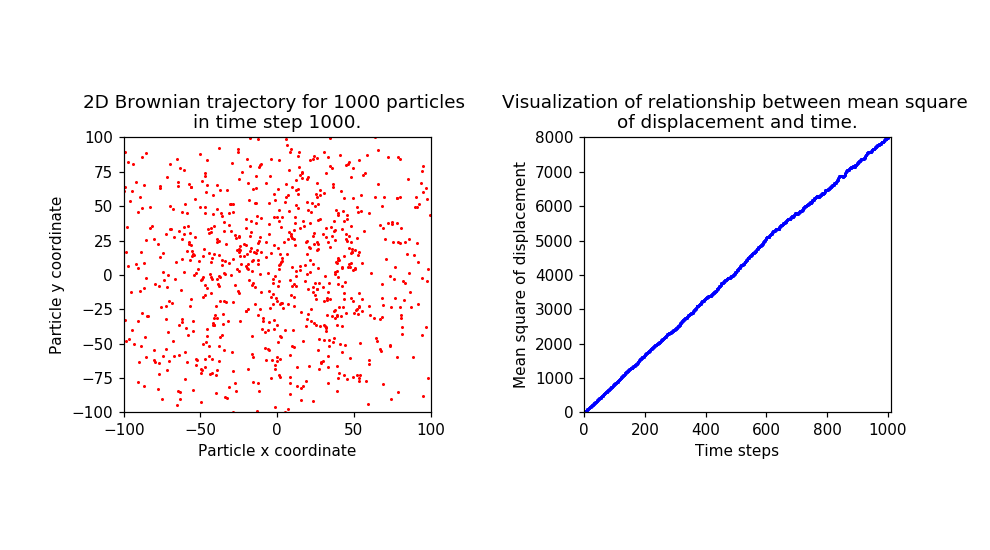

In [20]:

fig = plt.figure(figsize=(9, 5))
ax, axMsod = initGraphs()


# particels = setInitCoordinates(amount_particels,axis,border,colors)
particels = setInitCoordinatesZeros(amount_particels,colors)
   
runAll(particels,epochs,ax,axMsod)
# runAllColors(particels,epochs,ax,axMsod)

<IPython.core.display.Javascript object>


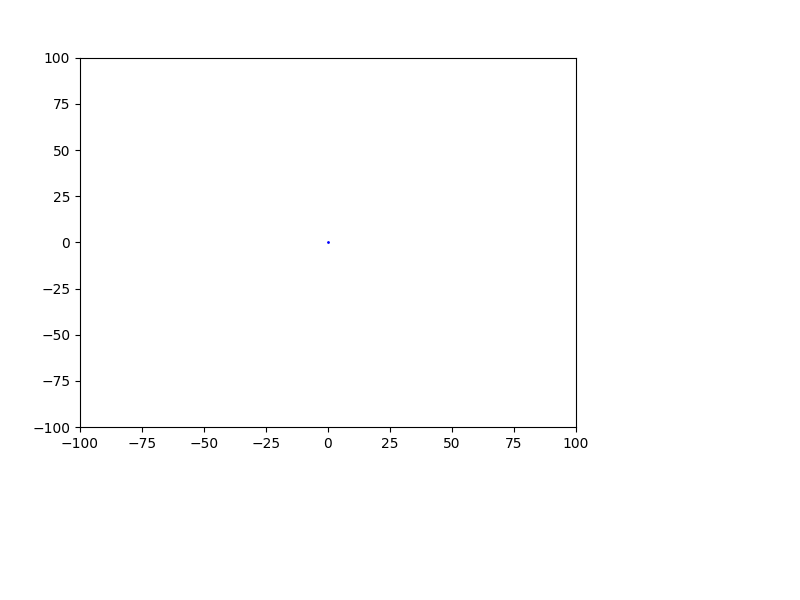

In [5]:
# fig, ax = initGraph(-axis,axis,-axis,axis,111)

# ax.plot(0,0,"bo",markersize=1)
# fig.canvas.draw()
# fig.clear()
# fig.canvas.draw()


# background = fig.canvas.copy_from_bbox(ax.bbox)

# fig.canvas.restore_region(background)

# ax.draw_artist(ax.plot(8, 8, 'ro')[0])
# fig.canvas.blit(ax.bbox)


# fig.canvas.draw()